###Computation to Determine Gait Cycle

In [1]:
%matplotlib inline
%precision 3
import numpy as np
import scipy
import ReadCsvs as rc
import thinkstats2
import thinkplot
import pylab as plt

/Users/jpoh/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jpoh/anaconda/lib/python2.7/argparse.pyc, but /Users/jpoh/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

####Frequency analysis with DFT of position, velocity, and acceleration

In [26]:
#DFT - transform of gait

import numpy as np
import pylab as plt
import thinkstats2
import thinkplot
def FreqCalc(data, sel_marker, pnum, trialnum):

#FullLabelSet=['SACRAL', 'R_ASIS', 'R_TROCH', 'R_THIGH', 'R_LAT_KNEE', 'R_TIB', 'R_LAT_MAL', 'R_TOE_5', 'R_TOE_1', 'R_MED_MAL', 'R_HEEL', 'R_MED_KNEE', 'L_MED_KNEE', 'L_HEEL', 'L_MED_MAL', 'L_TOE_1', 'L_TOE_5', 'L_LAT_MAL', 'L_TIB', 'L_LAT_KNEE', 'L_TROCH', 'L_THIGH', 'L_ASIS']
#Left = ['L_MED_KNEE', 'L_HEEL', 'L_MED_MAL', 'L_TOE_1', 'L_TOE_5', 'L_LAT_MAL', 'L_TIB', 'L_LAT_KNEE', 'L_TROCH', 'L_THIGH', 'L_ASIS']
#Right = ['R_ASIS', 'R_TROCH', 'R_THIGH', 'R_LAT_KNEE', 'R_TIB', 'R_LAT_MAL', 'R_TOE_5', 'R_TOE_1', 'R_MED_MAL', 'R_HEEL', 'R_MED_KNEE']
#j = 1 #subject number
#i = 3 #trial number

    frames = AFO[pnum].trials[trialnum].frames
    framerate = AFO[pnum].trials[trialnum].framerate
    drop_NA = []
    
    #Assign a time from frame and frame  - in seconds
    AFO[pnum].trials[trialnum].x["times"] = np.arange(0, frames) * (1.0/framerate)
    times = AFO[pnum].trials[trialnum].x["times"]

    vel_t = []
    acc_t = []
    marker_t = []
    time_t = []   
    
    for label in sel_marker:
        #drop NA from times and marker values
        drop_NA = AFO[pnum].trials[trialnum].x[["times", label]]
        drop_NA = drop_NA.dropna()
        marker = drop_NA[label]
        marker_t.append(marker)
        if len(marker) == 0:
            continue
        time = drop_NA["times"]
        time_t.append(time) #Adds the time series to a master list
        timeshape = time.shape[0]
    
        #Computes velocity
        time_step = np.diff(time)
        velocity = np.diff(marker)/time_step
        vel_t.append(velocity) #Stores velocity to a master list

        #Computes acceleration
        vel_time_step = np.diff(time)
        acc = np.diff(velocity)/vel_time_step[:-1]
        acc_t.append(acc)
        #acc = AFO[j].trials[i].x["acc"]
        #drop_acc_NA = acc.dropna(subset=[['acc', 'time']])
        
        #DFT position
        dft = np.fft.fft(marker)
        freq = np.fft.fftfreq(timeshape)*framerate
        
        #DFT velocity
        dft_vel = np.fft.fft(velocity)
        time_stepshape = time_step.shape[0]
        freq_vel = np.fft.fftfreq(time_stepshape)*framerate
        
        #DFT acceleration
        dft_acc = np.fft.fft(acc)
        acc_timeshape = vel_time_step[:-1].shape[0]
        freq_acc = np.fft.fftfreq(acc_timeshape)*framerate 
    
        #plotting
#         plt.figure(0)
#         plt.title("Frequency of Right Marker Positions")
#         plt.plot(freq, 2.0/frames * np.abs(dft[0:frames]))
#         plt.xlim((0,15))
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("DFT of %s Marker Positions" %label)
        
        v_time = time[:-1]
#         print np.shape(v_time), np.shape(vel_t), np.shape(velocity)
#         plt.figure(1)
#         plt.plot(v_time, velocity)
#         plt.xlabel("Time(s)")
#         plt.ylabel("Velocity (mm/s)")
        
#         plt.figure(0)
#         plt.title("Frequency of Right Marker Frequencies")
#         plt.plot(freq_vel, 2.0/frames * np.abs(dft_vel[0:frames]))
#         plt.xlim((0,15))
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("DFT of %s Marker Velocities" %label)
    
#         plt.figure(1)
#         plt.plot(freq_acc, 2.0/frames * np.abs(dft_acc[0:frames]))
#         plt.xlim((0,15))
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("DFT of %s Marker Accelerations" %label)
        
        plt.figure()
        plt.plot(time, marker, "o", alpha = .2)
        plt.xlabel("time (s)")
        plt.ylabel("Position of %s (mm)" %label)    
#         plt.figure()
#         plt.plot(time, marker, "o", alpha = .2)
#         plt.xlabel("time (s)")
#         plt.ylabel("Position of %s (mm)" %label)

        return time_t, vel_t, marker_t, dft, freq

ERROR! Session/line number was not unique in database. History logging moved to new session 252


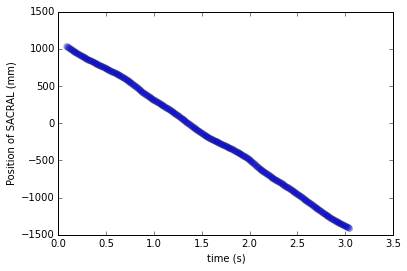

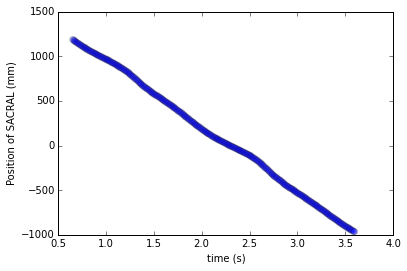

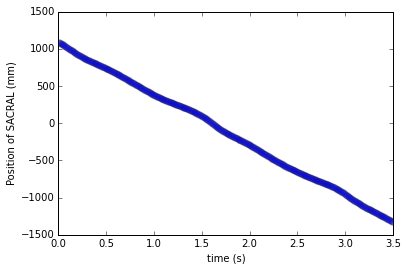

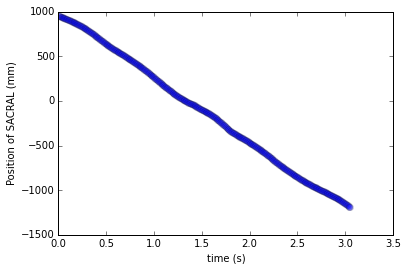

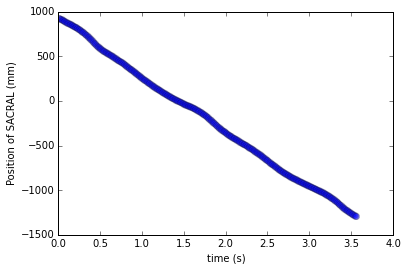

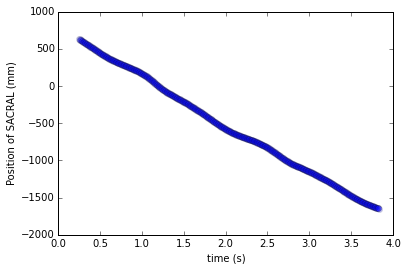

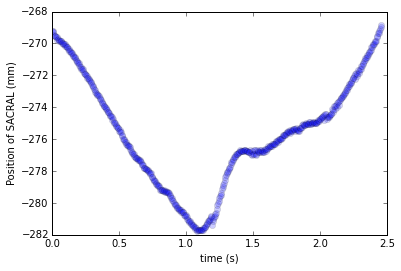

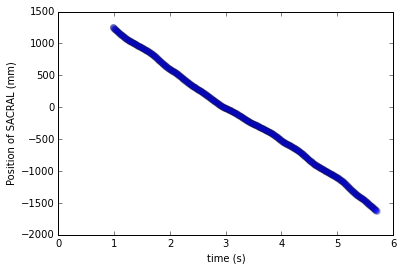

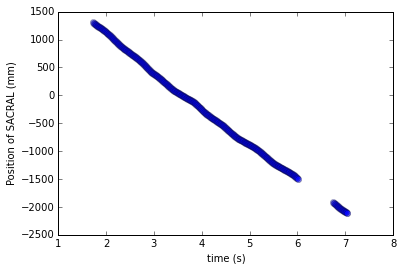

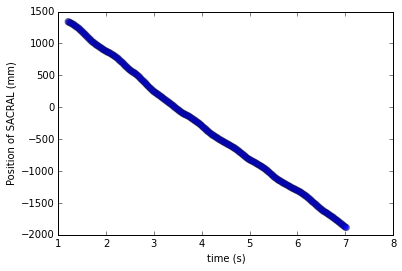

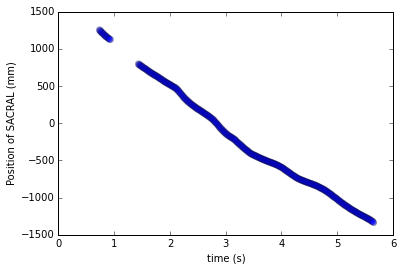

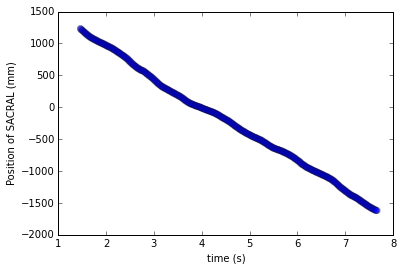

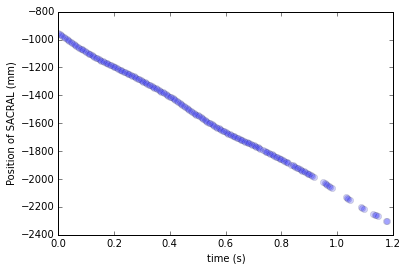

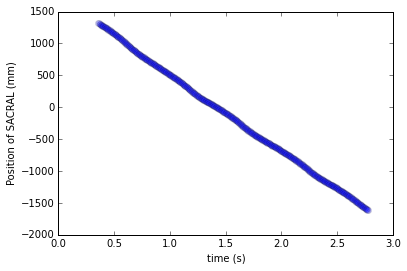

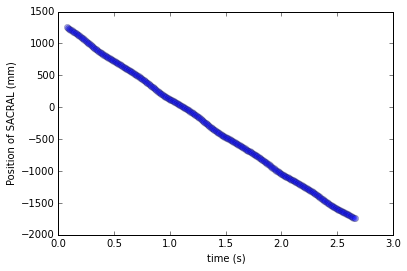

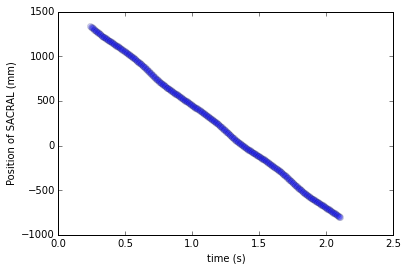

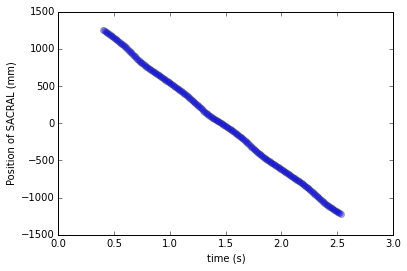

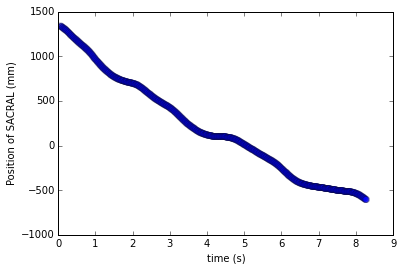

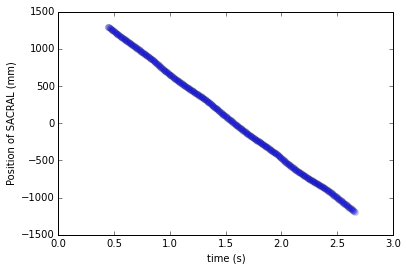

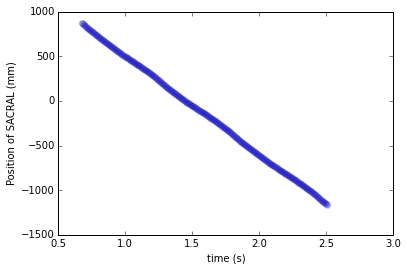

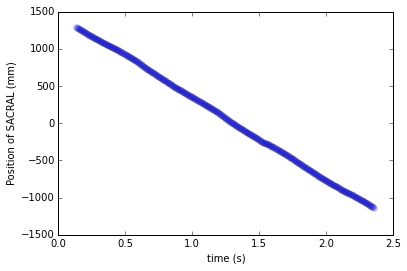

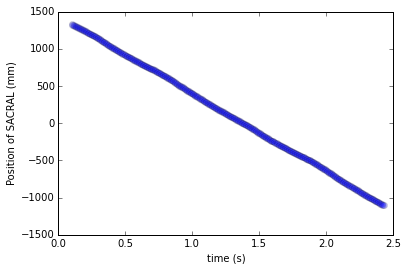

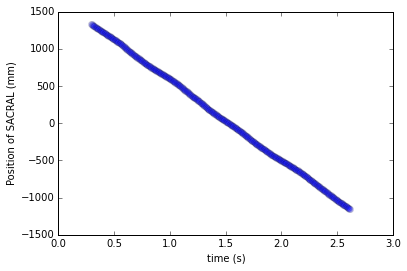

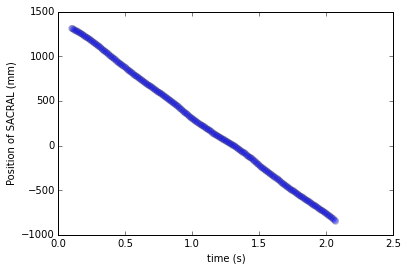

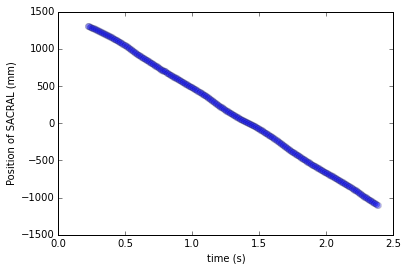

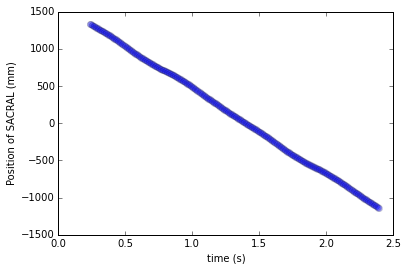

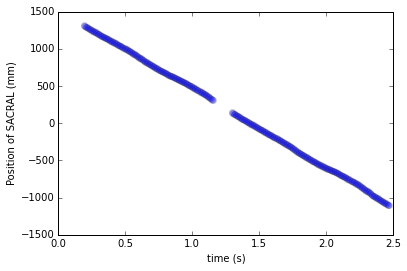

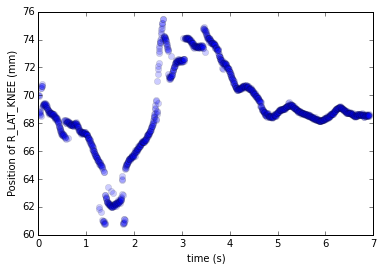

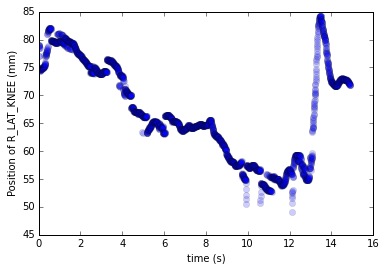

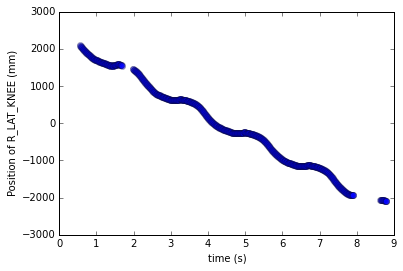

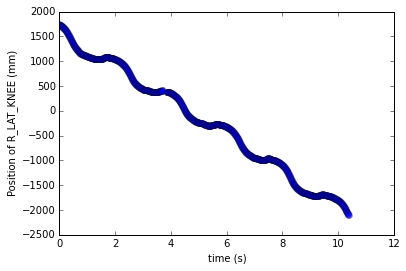

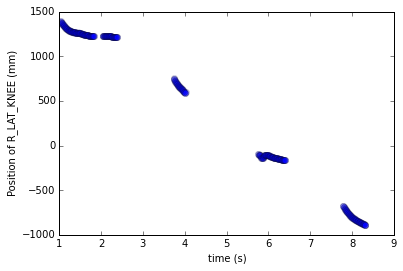

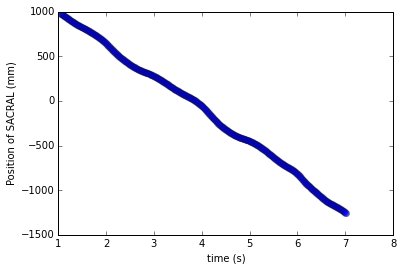

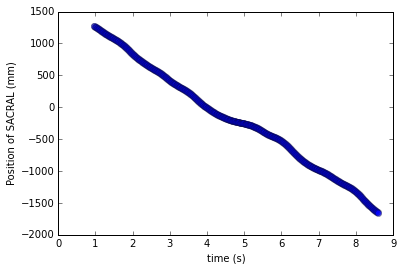

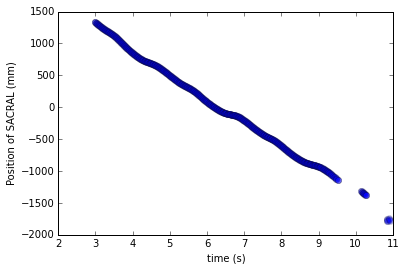

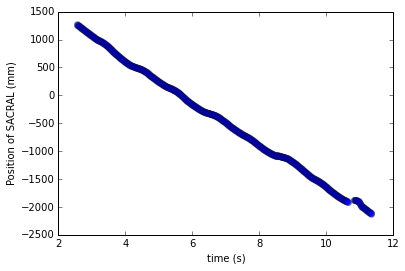

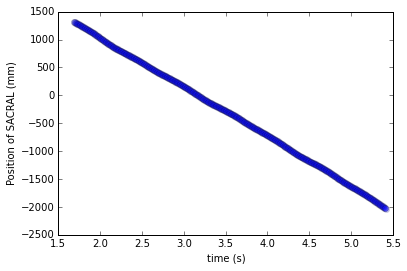

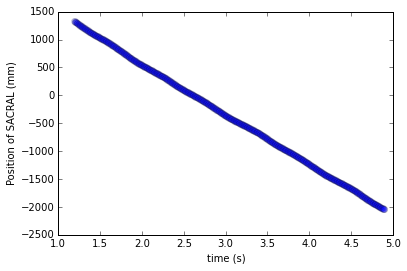

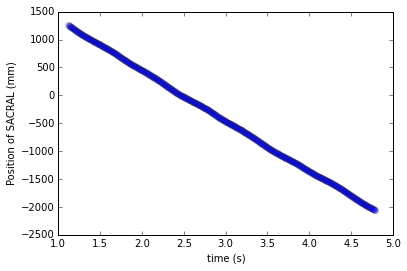

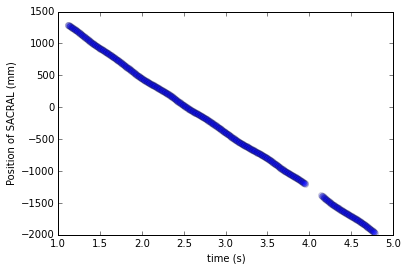

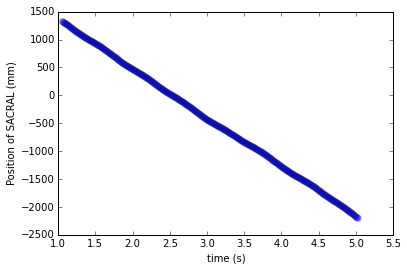

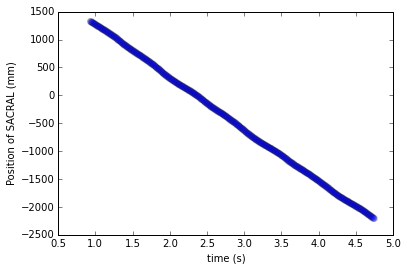

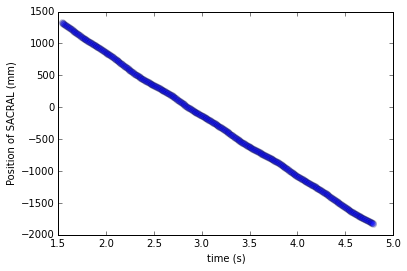

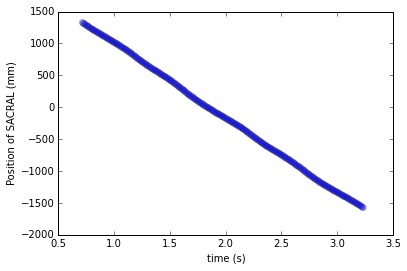

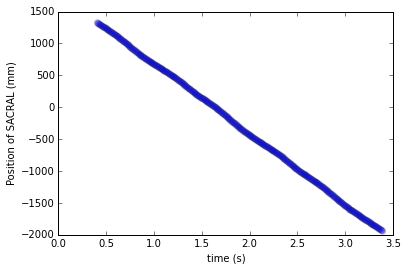

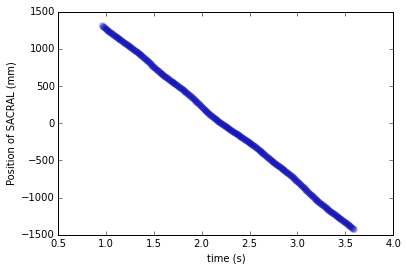

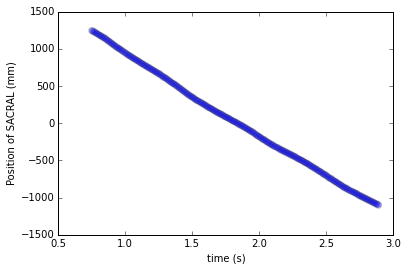

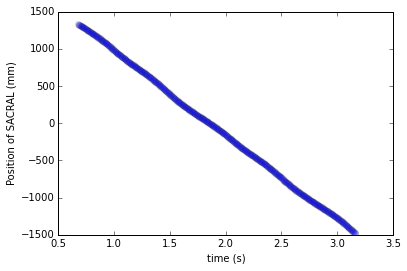

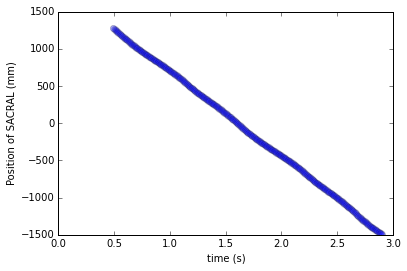

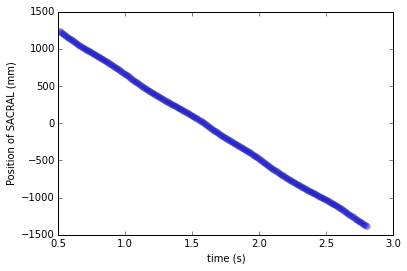

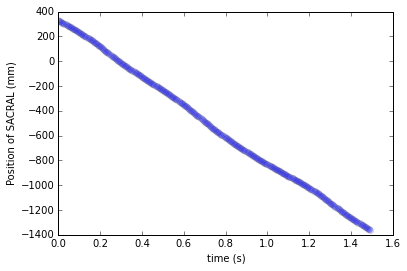

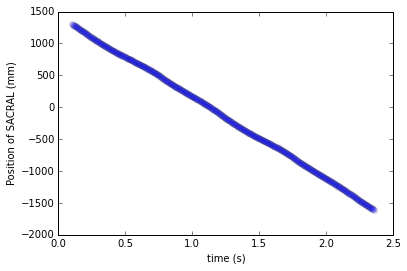

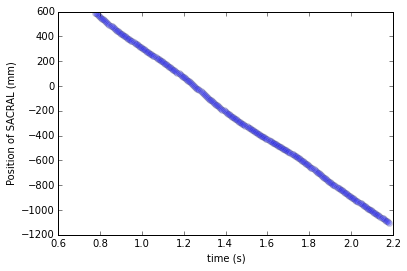

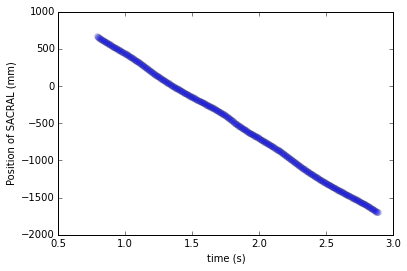

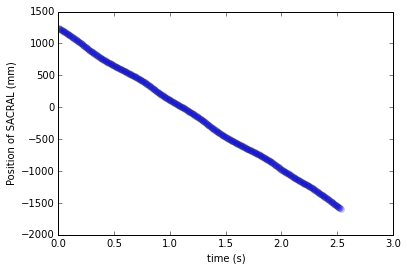

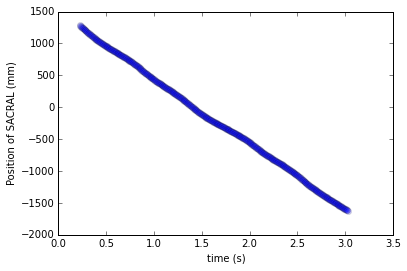

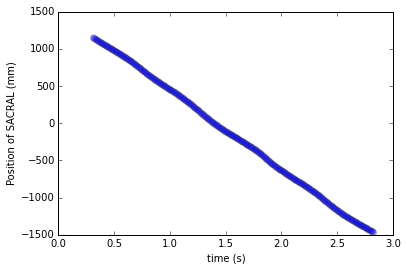

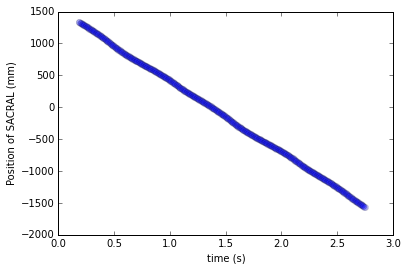

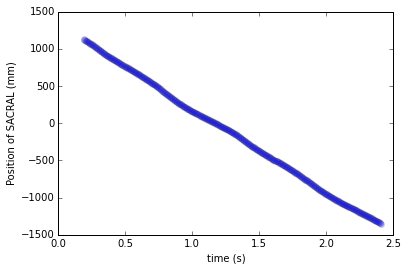

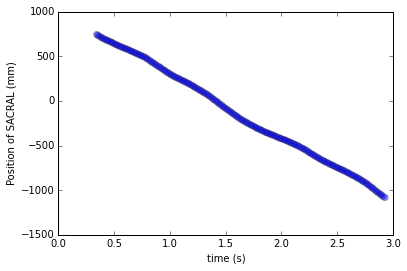

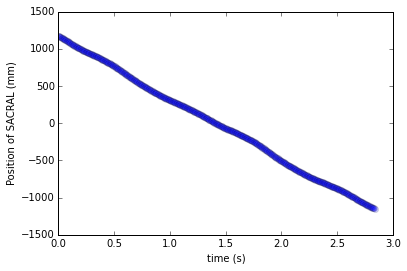

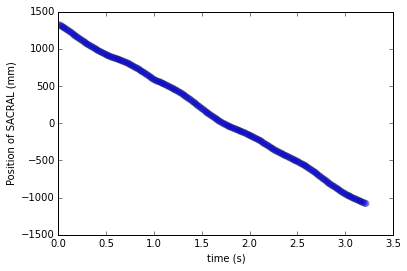

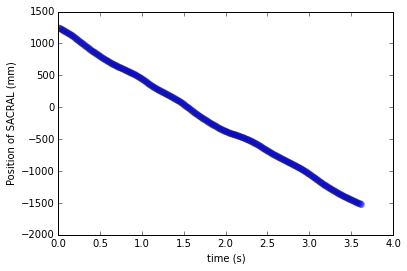

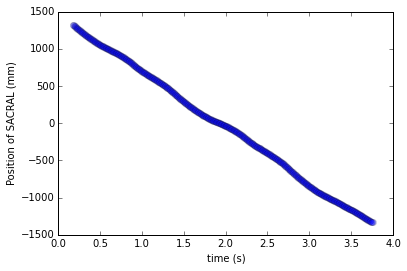

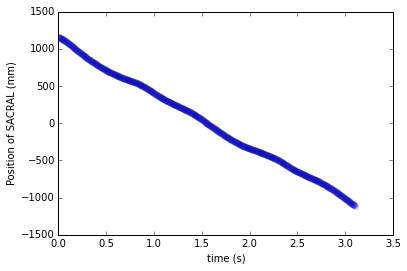

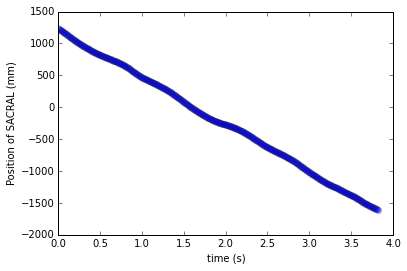

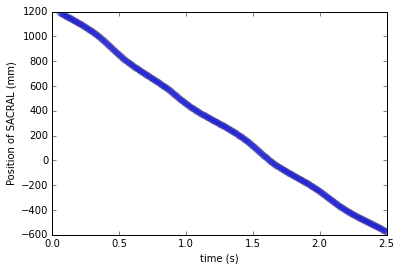

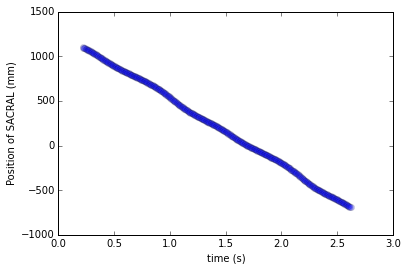

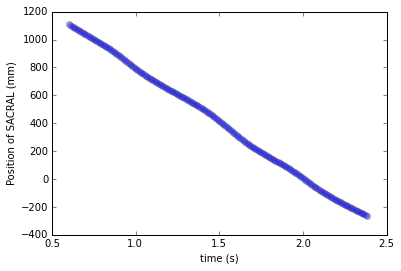

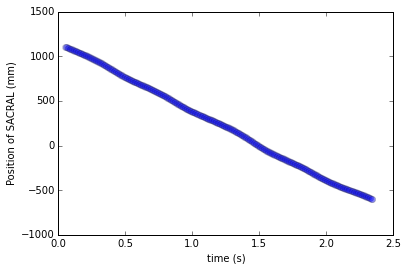

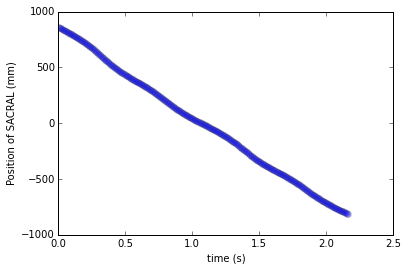

In [27]:
sel_marker=['SACRAL', 'R_ASIS', 'R_TROCH', 'R_THIGH', 'R_LAT_KNEE', 'R_TIB', 'R_LAT_MAL', 'R_TOE_5', 'R_TOE_1', 'R_MED_MAL', 'R_HEEL', 'R_MED_KNEE', 'L_MED_KNEE', 'L_HEEL', 'L_MED_MAL', 'L_TOE_1', 'L_TOE_5', 'L_LAT_MAL', 'L_TIB', 'L_LAT_KNEE', 'L_TROCH', 'L_THIGH', 'L_ASIS']
data=[AFO, PPAFO, Shoes]
p_list = AFO.keys() 

for participant in p_list:
    participant_obj=AFO[participant]
    #print participant_obj.trials.keys()
    for trial in participant_obj.trials.keys():
        if trial>3:  
            Frequency= FreqCalc(data, sel_marker, participant, trial)

####Gait Cycle Calculation

[ nan  nan  nan ...,  nan  nan  nan]


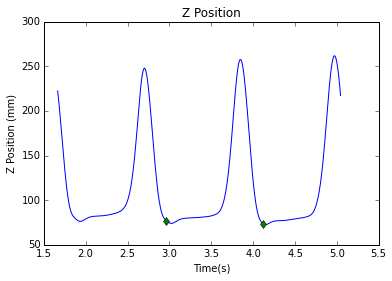

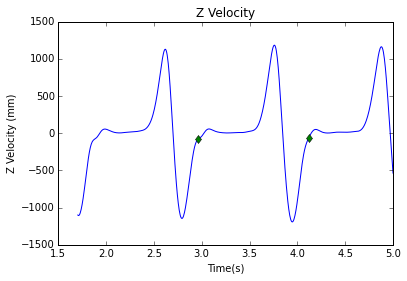

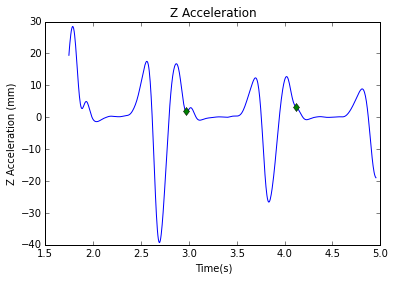

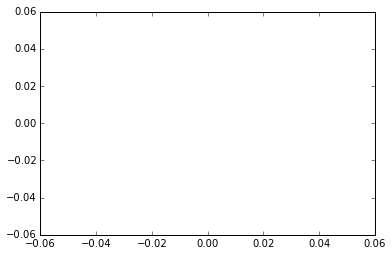

In [24]:
def HeelStrike(fw, pnum, trial, mark1, mark2):
##    """
##    finding the initial heel strike
##   """
    
    if fw=='AFO':
        dset=AFO
    if fw=='PPAFO':
        dset=PPAFO
    if fw=='Shoes':
        dset=Shoes
        
    MT_Obj = dset[pnum].GetTrial(trial) 
    cycle_start = []
    
    R_Heel_x = MT_Obj.x[mark2]
    R_Heel_y = MT_Obj.y[mark2]
    R_Heel_z = MT_Obj.z[mark2]
    L_Heel_x = MT_Obj.x[mark1]
    L_Heel_y = MT_Obj.y[mark1]
    L_Heel_z = MT_Obj.z[mark1]
    
    #time and velocity calculations
    frames = MT_Obj.frames
    framerate = MT_Obj.framerate
    MT_Obj.z['time'] = np.arange(0, frames) * (1.0/framerate)
    time = MT_Obj.z['time']
    R_Heel_z = thinkstats2.Smooth(R_Heel_z, sigma=7)
    
    #velocity
    time_step = np.diff(time)
    velocity = np.diff(R_Heel_z)/time_step
    v_smooth = thinkstats2.Smooth(velocity)
    v_time = time[:-1]
    
    #acceleration
    a_time = v_time[:-1]
    vel_time_step = np.diff(time)
    acc = np.diff(v_smooth)/a_time
    a_smooth = thinkstats2.Smooth(acc)
    
    pos = R_Heel_z[1:-1]
    vel = v_smooth[1:]
    acc = a_smooth
    heel = -15 * pos + -.1 * vel * vel +  .8 * acc
    
    filter = np.array([-1., -1., -1, -1, -1, -1, -1, -1,
                       0.,   0.,  0., 0., 0., 0,  0, 0])
    
    from scipy.signal import convolve
    down = convolve(vel, filter, 'same')
    
    heel += down*1.9
        
    #take derivative of heel
    down_time_step = np.diff(a_time)
    Max_zero = np.diff(down)/down_time_step
    
    #find maxima of derivative of heel
    threshold = 2000
    maxima = []
    index = []
    strike_time = []
    heel_strike = []
    hs_vel = []
    hs_acc = []
    
    for i in range(len(Max_zero) - 1):
        if Max_zero[i] > 0 and Max_zero[i+1] < 0 and down[i] > threshold:
            if (down[i+1] > down[i]):
                maxima.append([i+1, down[i+1]])
                index.append([i+1])
                strike_time.append(a_time[i+40])
                heel_strike.append(R_Heel_z[i+40])
                hs_vel.append(v_smooth[i+40])
                hs_acc.append(a_smooth[i+40])
            else:
                maxima.append([i, down[i]])
                index.append([i])
                strike_time.append(a_time[i+50])
                heel_strike.append(R_Heel_z[i+50])
                hs_vel.append(v_smooth[i+50])
                hs_acc.append(a_smooth[i+50])
#     print maxima, strike_time, heel_strike

#     plt.figure()
#     plt.title("Convovled")
#     plt.plot(a_time, down)  
#     plt.plot(strike_time, heel_strike, 'x')
#     plt.xlabel("Time(s)")
#     plt.ylabel("Convolved values")

    #plot against a_time, down and time, pos
    plt.figure()
    plt.title("Z Position")
    plt.plot(time,R_Heel_z)
    plt.plot(strike_time, heel_strike, 'd')
    plt.xlabel("Time(s)")
    plt.ylabel("Z Position (mm)")
    
#     print len(v_time)
#     print len(hs_vel)
    
    #plot against a_time, down and time, pos
    plt.figure()
    plt.title("Z Velocity")
    plt.plot(v_time,v_smooth)
    plt.plot(strike_time, hs_vel, 'd')
    plt.xlabel("Time(s)")
    plt.ylabel("Z Velocity (mm)")
    
    #plot against a_time, down and time, pos
    plt.figure()
    plt.title("Z Acceleration")
    plt.plot(a_time, a_smooth)
    plt.plot(strike_time, hs_acc, 'd')
    plt.xlabel("Time(s)")
    plt.ylabel("Z Acceleration (mm)")
    
    
    #down_dev = np.diff(down)/a_time[:-1]
    #mask = np.where(np.logical_and(down_dev>-10, down_dev<10))
    #a_mask = np.where(acc<0)
    #plt.figure(5)
    #plt.plot(a_time[:-1],down_dev, 'o')
   
#     plt.title("heel val")
#     plt.plot(a_time, heel)
#     plt.ylim([-10000, 4000])
    
    #vel_zero = R_Heel_z[np.where(np.logical_and(velocity>-5, velocity<5))]
    acc_neg = R_Heel_z[np.where(acc<0)]
    v_mask = np.where(np.logical_and(velocity>-5, velocity<5))
    a_mask = np.where(acc<0)
    return heel_strike, time, R_Heel_z, v_time, vel, a_time, down, heel
        
cycle_start = HeelStrike('AFO', 11, 4, 'L_HEEL', 'R_HEEL')
#AFO_cycle_start = [HeelStrike('AFO', x, 4, 'L_HEEL', 'R_HEEL') for x in [1, 2, 4]]#, 5, 8, 9, 11, 12, 13, 14, 16]]
#PPAFO_cycle_start = [HeelStrike('PPAFO', x, 4, 'L_HEEL', 'R_HEEL') for x in [1, 2, 4]]#, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16]]
#Shoes_cycle_start = [HeelStrike('Shoes', x, 4, 'L_HEEL', 'R_HEEL') for x in [1, 2, 4]]#, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16]]


###########################################################################################################
def EstimatedAutocorr(x):
##    """
##    Using autocorrelation transpose the signal until the two signals line up. The first heel strike should overlay the second.
##    """   
    x = cycle_start[2]
    time = cycle_start[1]
    #print x.shape    
    #print time.shape
    drop_NA = np.vstack((x, time))
    #print drop_NA.shape, x.shape#, y.shape
    #print type(drop_NA)
    drop_NA = drop_NA.T
    #print drop_NA.shape
    x = drop_NA[:,0]
    #print "before", x
    #x = x[~np.isnan(x).any()]
    #print "after", x
    #n = len(x)
    #var = np.var(x)
    tao = np.correlate(x, x, mode='full')
    # assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    #result = r/(var*(np.arange(n, 0, -1)))
    plt.figure(4)
    plt.plot(tao)
    return tao

autocorr = EstimatedAutocorr(cycle_start)
print autocorr


####Autocorrelate to get second heel strike

#### Frequency to get second heel strike